In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)

print(cwd)
print(code_root)

/cosma/home/durham/dc-wils7/DESI/docs/nb
/cosma/home/durham/dc-wils7/DESI


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
# from   poisson     import fillfactor_expectation, fillfactor_poisson

In [4]:
survey  = 'desi'
field   = 'R8'
dryrun  = False
realz   = 0
version = 'latest'

In [5]:
nbar   = 2.
radius = 8.

In [6]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15651),
             ('FIELD', 'R8'),
             ('AREA', 6.2604),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 264179.3799184888),
             ('RAND_DENS', 0.05924383653572447),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.0579211135021),
             ('NRAND8_PERR', 11.27199721049922),
             ('EXTNAME', 'RANDOMS')])

In [7]:
bound = Table.read(fpath, 'BOUNDARY')
bound

BOUND_RA,BOUND_DEC,Z,V,BOUNDID,FIELD,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
float64,float64,float64,float64,int64,bytes2,bytes3,float64,float64,float64,float64,float64,float64
215.8055928832023,-0.6747789215006321,0.03929302086300004,22.474041552241374,0,R8,G15,-94.81616909325058,-68.39764858171377,-1.3769460014157895,116.91535043532375,-1.008822235161368,-0.15278613026759458
216.4388480611691,-1.0803389157602936,0.20463238266637868,129199.07148998881,1,R8,G15,-473.5573314967302,-349.63243623323365,-11.100437489054325,588.7242164887551,1.4264875887587323,-4.9364406204423625
216.45020290856965,-1.0769109430614066,0.0696437909950573,4580.547426108004,2,R8,G15,-165.67762992253353,-122.37230306710495,-3.871813286376932,205.99955302348422,0.5399596593069163,-1.7149782829430205
215.80641541329354,-0.6800293271309386,0.19067538691769761,105275.68532996958,3,R8,G15,-446.196119574281,-321.88274514345494,-6.530271535112622,550.1991163222839,-4.739575238145278,-0.7694253015459491
216.4574777412823,-1.0745589513322926,0.23115423638545968,183490.4684306468,4,R8,G15,-531.7718558174943,-392.880061848365,-12.401289573443279,661.2537576555595,1.817206616668443,-5.477898060052374
216.21598192509884,-1.092892023836697,0.16118770234437466,64406.92845606852,5,R8,G15,-377.52741895612803,-276.4700497500894,-8.926728173718082,468.0017539503466,-0.6861750918308189,-4.026712247324161
216.74208240273168,-0.36638210849523034,0.23725662631612568,197702.82489225332,6,R8,G15,-543.1681007859381,-405.48595718869535,-4.334478809442417,677.8157934248242,5.229926984362407,2.762778094479425
216.60557657004904,-0.20423753273176715,0.14445986737925945,46577.12486550122,7,R8,G15,-337.8852292433225,-250.98674509882704,-1.5003706065038436,420.8913601988979,2.2448077110014424,2.906753573187204
216.1784260766113,-1.0849980051265362,0.11146461946982777,21304.303803611223,8,R8,G15,-263.87674532103836,-192.97604269360386,-6.191381010285539,326.956999255767,-0.69366020552755,-2.768112516851339


In [8]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15651),
             ('FIELD', 'R8'),
             ('AREA', 6.2604),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 264179.3799184888),
             ('RAND_DENS', 0.05924383653572447),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.0579211135021),
             ('NRAND8_PERR', 11.27199721049922),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0)])

In [9]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15651),
             ('FIELD', 'R8'),
             ('AREA', 6.2604),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 264179.3799184888),
             ('RAND_DENS', 0.05924383653572447),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.0579211135021),
             ('NRAND8_PERR', 11.27199721049922),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0)])

In [10]:
rand

LOCATION,FIBER,TARGETID,RANDOM_RA,RANDOM_DEC,TILEID,ROS,ROS_DIST,Z,V,RANDID,FIELD,GAMA_FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,IS_BOUNDARY,RAND_N8,FILLFACTOR,BOUND_DIST,BOUNDID,FILLFACTOR_POISSON
int32,int32,int64,float64,float64,int64,int64,float64,float32,float32,int64,bytes2,bytes3,float32,float32,float32,float64,float64,float64,int64,int32,float64,float64,int64,float64
2288,1336,327858146372486294,215.29411567810524,-0.84762289922318,236,8,1.0358365337369497,0.07451039,6786.334,6667,R8,G15,-179.69966,-127.20674,-3.257347,220.1534854054791,-3.935554582873962,-1.0430147660524933,0,43,0.33842832956150504,1.7958728601090734,711285,0.33842832956150504
1032,926,327858134305473613,216.20328560598008,-1.1381091487023045,230,8,0.5467292834328342,0.24124576,207595.55,3911,R8,G15,-555.57465,-406.6681,-13.678134,688.6085322764295,-1.382690397487636,-6.752196475324163,0,102,0.8027834794249654,0.6275856736095606,274618,0.8027834794249654
5287,2866,327858182628051802,216.29504649188664,0.6404819628713588,237,8,1.2404918526492537,0.18693882,100020.52,15330,R8,G15,-435.09222,-319.5491,6.034756,539.7423582652737,-0.21955185373246877,11.4642641984003,0,87,0.6847270853918823,2.4487320517229723,520320,0.6847270853918823
5086,2548,327858164508658627,216.3080726478245,-0.037413679248326705,232,8,0.562644233418955,0.25414962,240685.83,11255,R8,G15,-582.9836,-428.37048,-0.47240308,723.41207855548,-0.12975836226604542,6.804287115895597,0,96,0.7555609218117322,0.7941514768748359,70871,0.7555609218117322
1171,778,327858128261482003,215.85205599525318,-1.3766193244461797,236,8,0.8965091389591764,0.21393047,147342.28,2217,R8,G15,-497.7471,-359.67444,-14.75752,614.1962769725617,-4.997700050229014,-8.580140661776,0,99,0.7791722006183488,4.251151522928364,212937,0.7791722006183488
7180,3552,327858164525434960,217.32175556025078,-0.06393323599825426,233,8,1.1538237897190216,0.16883819,74535.336,11829,R8,G15,-389.23206,-296.749,-0.5461511,489.3559441596758,8.571177592797227,4.37619318022615,0,80,0.6296341015097768,2.9573328585819425,501068,0.6296341015097768
81,265,327858134313863333,216.58942303774248,-1.3234967528573087,236,8,0.7792230315709024,0.21540874,150275.02,4291,R8,G15,-496.338,-368.471,-14.28166,618.2658830892412,2.924598619842129,-8.063321273518856,0,105,0.826394758231582,3.0181493763242107,298201,0.826394758231582
6021,3324,327858164512851078,216.5065711282421,-0.10533538979464188,228,8,0.5360623339425876,0.23312531,188320.55,11315,R8,G15,-535.8318,-396.58978,-1.2255719,666.6077099241298,2.1899548998807745,5.47969198842958,0,78,0.6138932489720325,0.4209583098255327,6952,0.6138932489720325
4064,2455,327858164500267802,215.95502561334945,-0.10705243772856136,233,8,0.601663827834604,0.2014174,123959.87,10819,R8,G15,-469.41055,-340.4841,-1.0834832,579.8627311390799,-3.6771746363857005,4.749230639342734,0,84,0.6611158065852657,1.0384025920039994,219675,0.6611158065852657


In [11]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 15651),
             ('FIELD', 'R8'),
             ('AREA', 37.7424),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 264179.3799184888),
             ('RAND_DENS', 0.05924383653572447),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 127.0579211135021),
             ('NRAND8_PERR', 11.27199721049922),
             ('EXTNAME', 'ZCATALOG'),
             ('RSPHERE', 8.0),
             ('TILEID', 238),
             ('TILERA', 216.327),
             ('TILEDEC', -0.717),
             ('FIELDROT', -0.0743063091867413),
             ('FA_PLAN', '2022-07-01T00:00:00.000'),
             ('FA_HA', 0.0),
             ('FA_RUN', '2021-05-29T23:32:41+00:00'),
             ('REQRA', 216.327),
             ('REQDEC', -0.717),
             ('FIELDNUM', 0),
             ('FA_VER', '4.0.0'),
             ('FA_SURV', 'sv3'),
             ('DEPNAM00', 'python'),
     

Text(0, 0.5, 'DEC [deg.]')

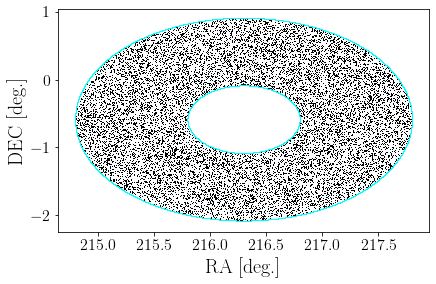

In [12]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0, c='k')
pl.plot(bound['BOUND_RA'], bound['BOUND_DEC'], marker=',', lw=0.0, c='cyan')
pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

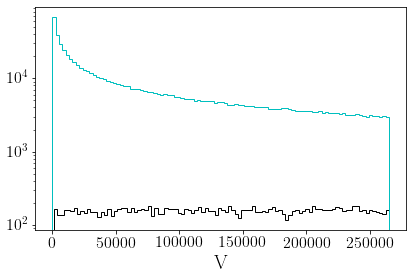

In [13]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

pl.xlabel('V')
pl.yscale('log')

(0.0, 0.6)

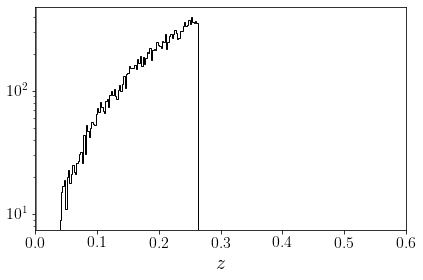

In [14]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [15]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

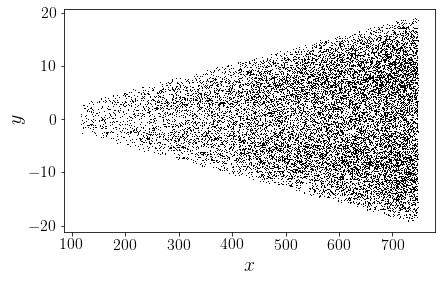

In [16]:
pl.plot(pos[::1,0], pos[::1,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

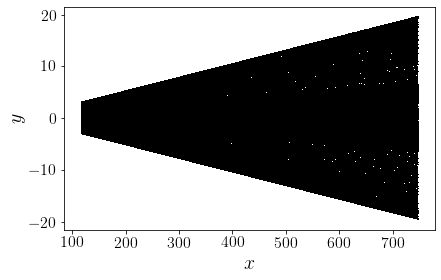

In [17]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

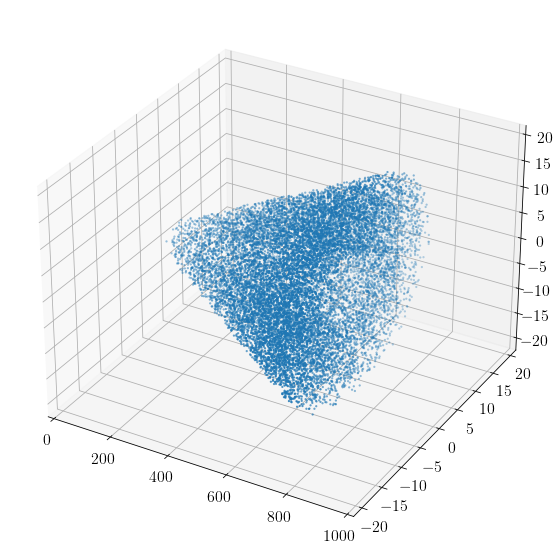

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::1, 0],\
           pos[::1, 1],\
           pos[::1, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

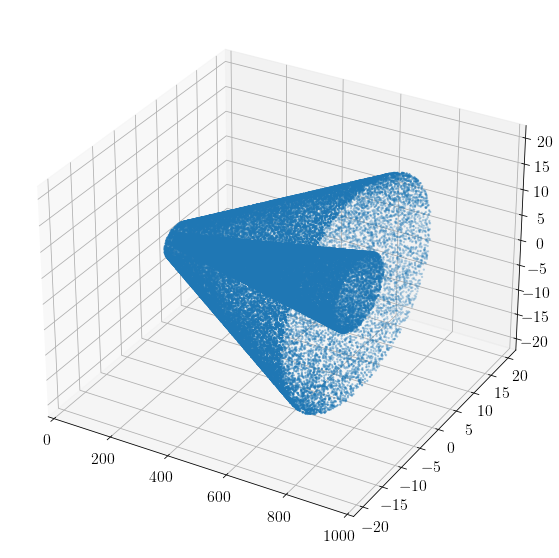

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [20]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01003130790364833

In [21]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(11, 150)

(50.0, 500.0)

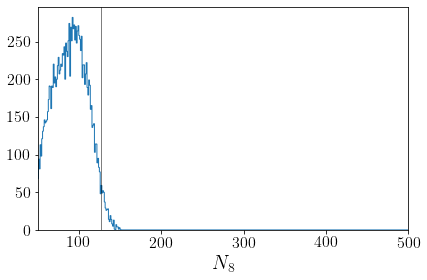

In [22]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 3500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 500.)

In [23]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

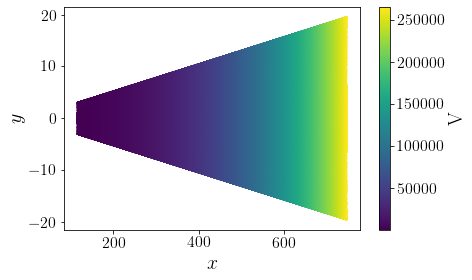

In [25]:
# isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

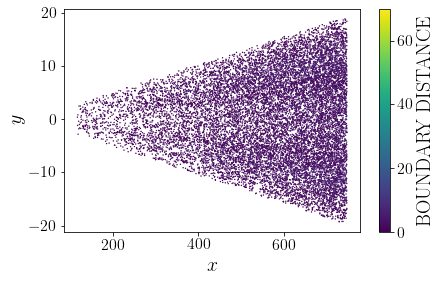

In [26]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

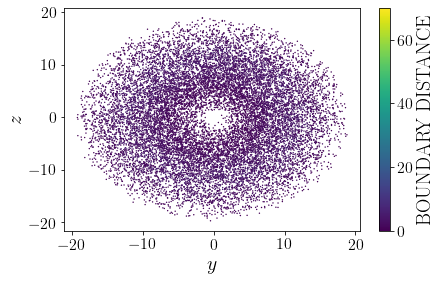

In [27]:
pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

In [28]:
# pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
# pl.xlabel('$x$')
# pl.ylabel('$y$')
# pl.colorbar(label=r'$N_8$')

(0.2, 1.1)

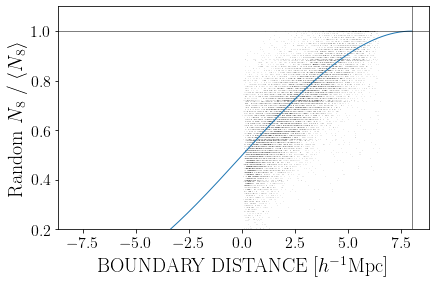

In [32]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h

sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

# pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8), lw=1.)

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h
sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.plot(radius - d, sphere_cap_vol)
pl.plot(radius - d, fillfactor_expectation(d, nbar, radius))


pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

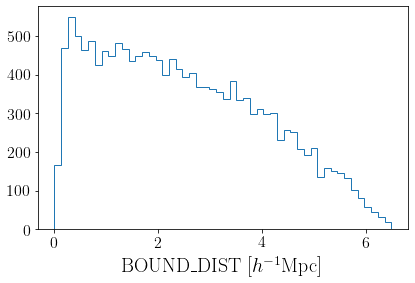

In [34]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [35]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
gold.meta

OrderedDict([('EXTNAME', 'ZCATALOG'),
             ('TILEID', 238),
             ('TILERA', 216.327),
             ('TILEDEC', -0.717),
             ('FIELDROT', -0.0743063091867413),
             ('FA_PLAN', '2022-07-01T00:00:00.000'),
             ('FA_HA', 0.0),
             ('FA_RUN', '2021-05-29T23:32:41+00:00'),
             ('REQRA', 216.327),
             ('REQDEC', -0.717),
             ('FIELDNUM', 0),
             ('FA_VER', '4.0.0'),
             ('FA_SURV', 'sv3'),
             ('DEPNAM00', 'python'),
             ('DEPVER00', '3.8.3'),
             ('DEPNAM01', 'numpy'),
             ('DEPVER01', '1.19.1'),
             ('DEPNAM02', 'matplotlib'),
             ('DEPVER02', '3.2.1'),
             ('DEPNAM03', 'astropy'),
             ('DEPVER03', '4.0.1.post1'),
             ('DEPNAM04', 'fitsio'),
             ('DEPVER04', '1.1.2'),
             ('DEPNAM05', 'desiutil'),
             ('DEPVER05', '3.2.1'),
             ('DEPNAM06', 'desimodel'),
             ('DEPVER06', 

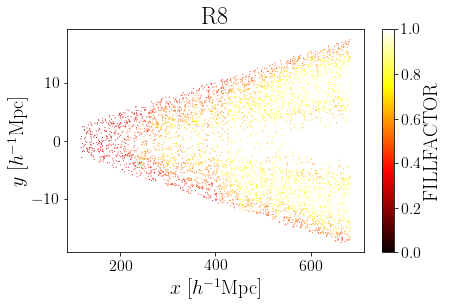

In [39]:
ddp_zmin  = gold.meta['DDP1_ZMIN']
ddp_zmax  = gold.meta['DDP1_ZMAX']

isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=4,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

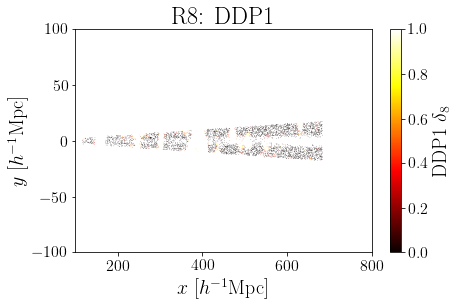

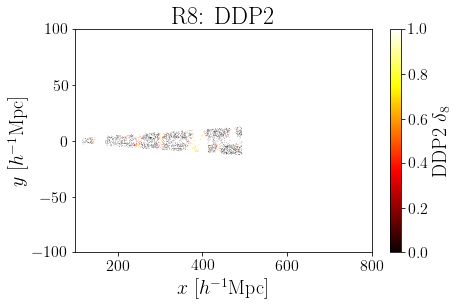

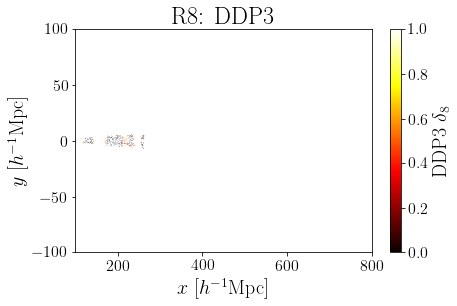

In [40]:
for idx in np.arange(1, 4, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

    fills     = rand['DDP{}_DELTA8'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [41]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

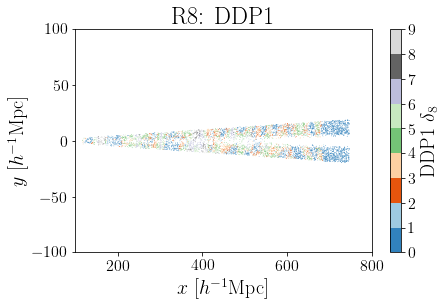

In [42]:
for idx in np.arange(1, 2, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)
    isin      = rand['DDP{}_DELTA8_TIER'.format(idx)] > -999
    
    fills     = rand['DDP{}_DELTA8_TIER'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=2,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))

Text(0, 0.5, 'DDP2 $\\delta_8$')

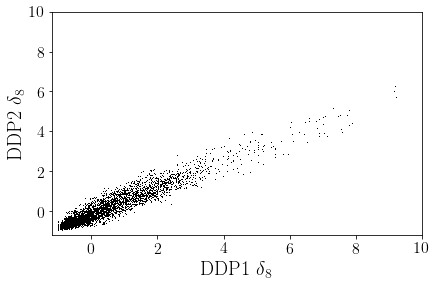

In [43]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [44]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

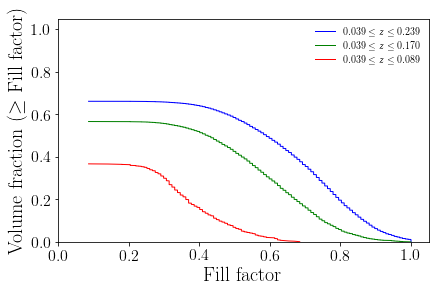

In [45]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=1)

# Done.